### Import library

In [1]:
import numpy as np
import control as co
import matplotlib.pyplot as plt

### Stable system

In [2]:
s=co.tf('s')
forward=3/(s*(s+1)*(s+2))
forward

TransferFunction(array([3]), array([1., 3., 2., 0.]))

In [3]:
G=co.feedback(sys1=forward, sys2=1)
G

TransferFunction(array([3]), array([1., 3., 2., 3.]))

(array([-2.67169988+0.j        , -0.16415006+1.04686932j,
        -0.16415006-1.04686932j]),
 array([], dtype=float64))

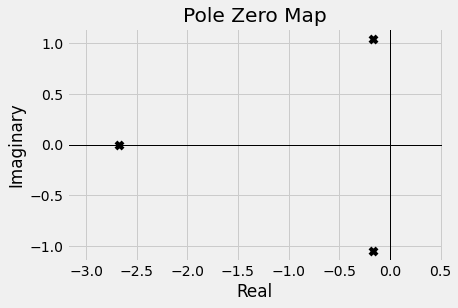

In [4]:
plt.style.use('fivethirtyeight')
co.pzmap(G)

(0.0, 1.6428661788122507)

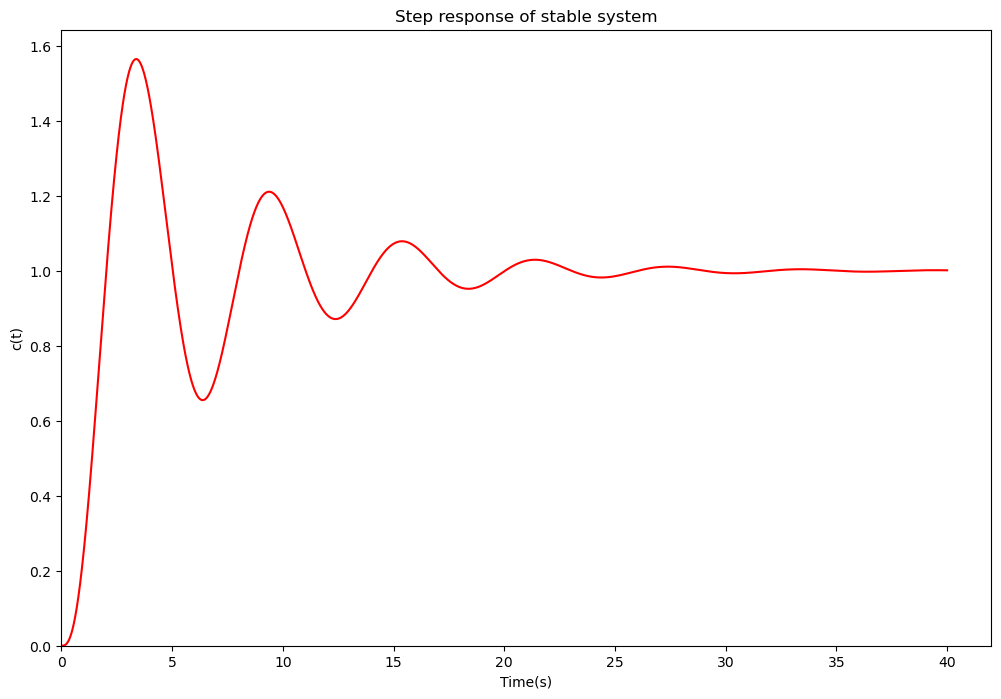

In [5]:
plt.style.use('default')

t=np.linspace(0, 40,10000)
_, yout=co.step_response(G,t)

fig, ax=plt.subplots(figsize=(12,8))
ax.plot(t, yout, color='r', linewidth=1.5)

ax.set_title('Step response of stable system')
ax.set_xlabel('Time(s)')
ax.set_ylabel('c(t)')
ax.set_xlim(0)
ax.set_ylim(0)

### Marginally stable system

In [6]:
G=3/((s+2)*(s+2j)*(s-2j))
G

TransferFunction(array([3]), array([1.+0.j, 2.+0.j, 4.+0.j, 8.+0.j]))

C:\Users\HP-NPC\anaconda3\lib\site-packages\control\xferfcn.py:957: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
C:\Users\HP-NPC\anaconda3\lib\site-packages\control\xferfcn.py:987: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


(array([-2.00000000e+00+0.j,  2.49800181e-16+2.j,  2.49800181e-16-2.j]),
 array([], dtype=float64))

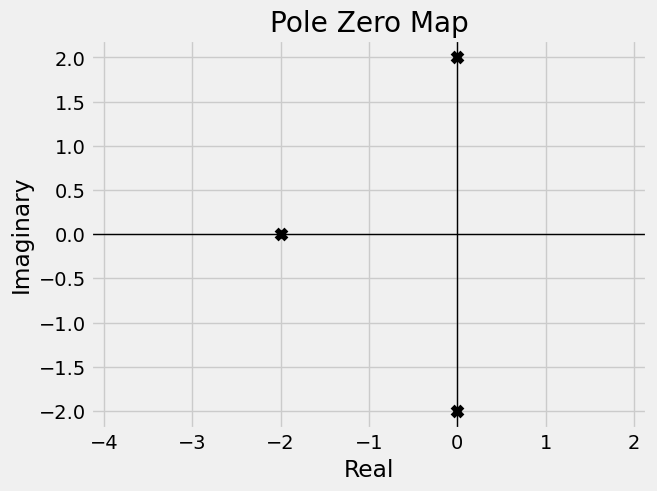

In [7]:
plt.style.use('fivethirtyeight')
co.pzmap(G)

C:\Users\HP-NPC\anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)


(0.0, 0.6721732911618324)

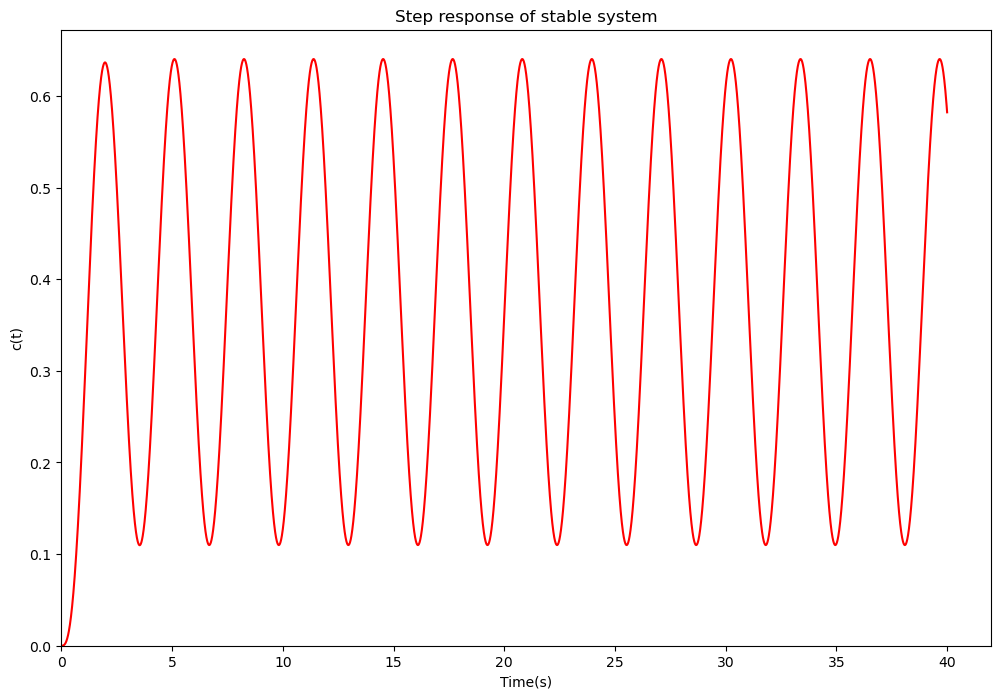

In [8]:
plt.style.use('default')

t=np.linspace(0, 40,10000)
_, yout=co.step_response(G,t)

fig, ax=plt.subplots(figsize=(12,8))
ax.plot(t, yout, color='r', linewidth=1.5)

ax.set_title('Step response of stable system')
ax.set_xlabel('Time(s)')
ax.set_ylabel('c(t)')
ax.set_xlim(0)
ax.set_ylim(0)

In [9]:
G=3/((s+2j)*(s-2j))
G

TransferFunction(array([3]), array([1.+0.j, 0.+0.j, 4.+0.j]))

C:\Users\HP-NPC\anaconda3\lib\site-packages\control\xferfcn.py:957: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
C:\Users\HP-NPC\anaconda3\lib\site-packages\control\xferfcn.py:987: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


(array([2.77555756e-17+2.j, 2.77555756e-17-2.j]), array([], dtype=float64))

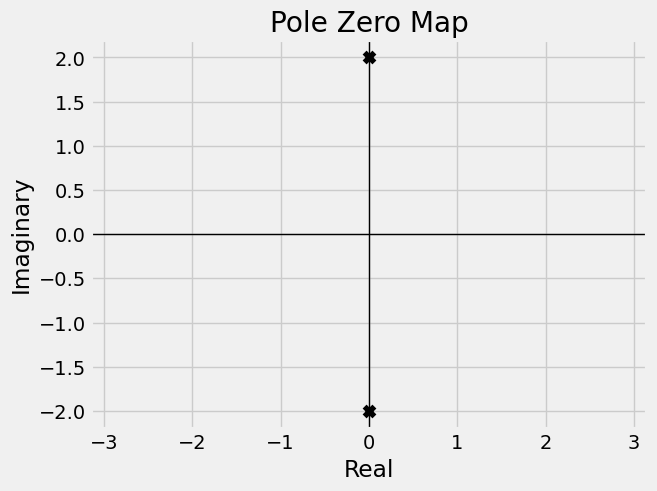

In [10]:
plt.style.use('fivethirtyeight')
co.pzmap(G)

C:\Users\HP-NPC\anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)


(0.0, 1.5749999893407267)

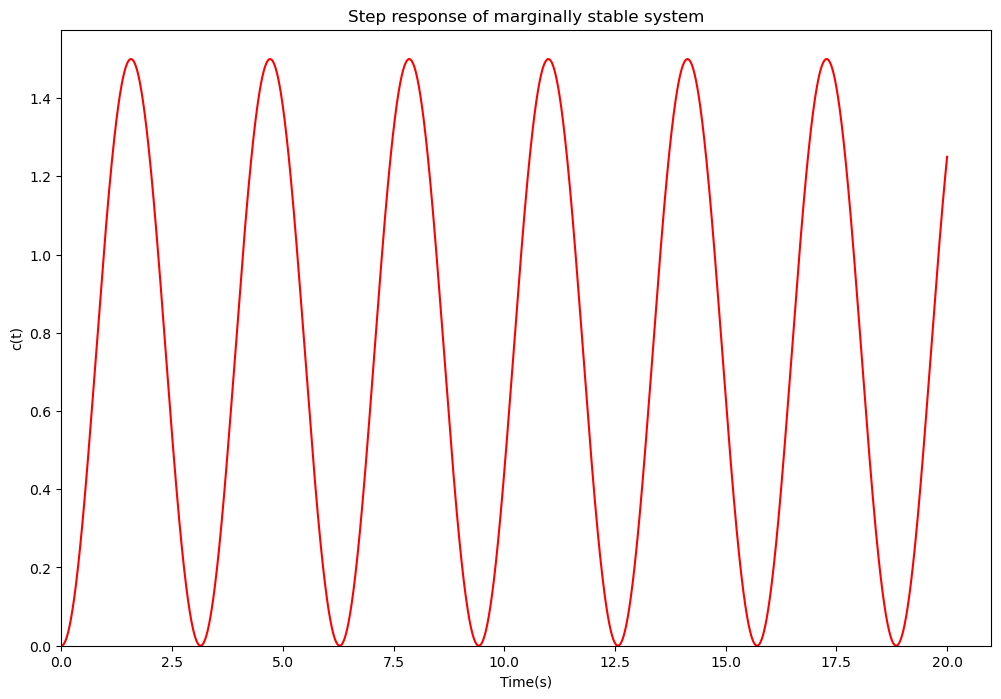

In [11]:
plt.style.use('default')

t=np.linspace(0, 20,10000)
_, yout=co.step_response(G,t)

fig, ax=plt.subplots(figsize=(12,8))
ax.plot(t, yout, color='r', linewidth=1.5)

ax.set_title('Step response of marginally stable system')
ax.set_xlabel('Time(s)')
ax.set_ylabel('c(t)')
ax.set_xlim(0)
ax.set_ylim(0)

### Unstable system

In [12]:
G=3/(s**3+3*s**2+2*s+7)
G

TransferFunction(array([3]), array([1., 3., 2., 7.]))

(array([-3.08674534+0.j        ,  0.04337267+1.50528389j,
         0.04337267-1.50528389j]),
 array([], dtype=float64))

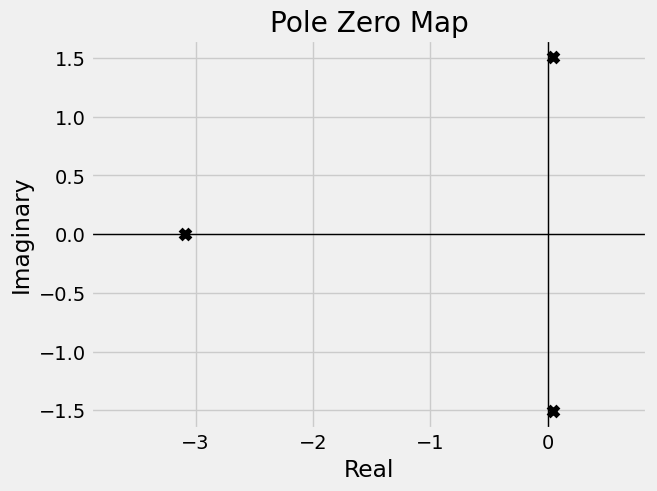

In [13]:
plt.style.use('fivethirtyeight')
co.pzmap(G)

(0.0, 42.0)

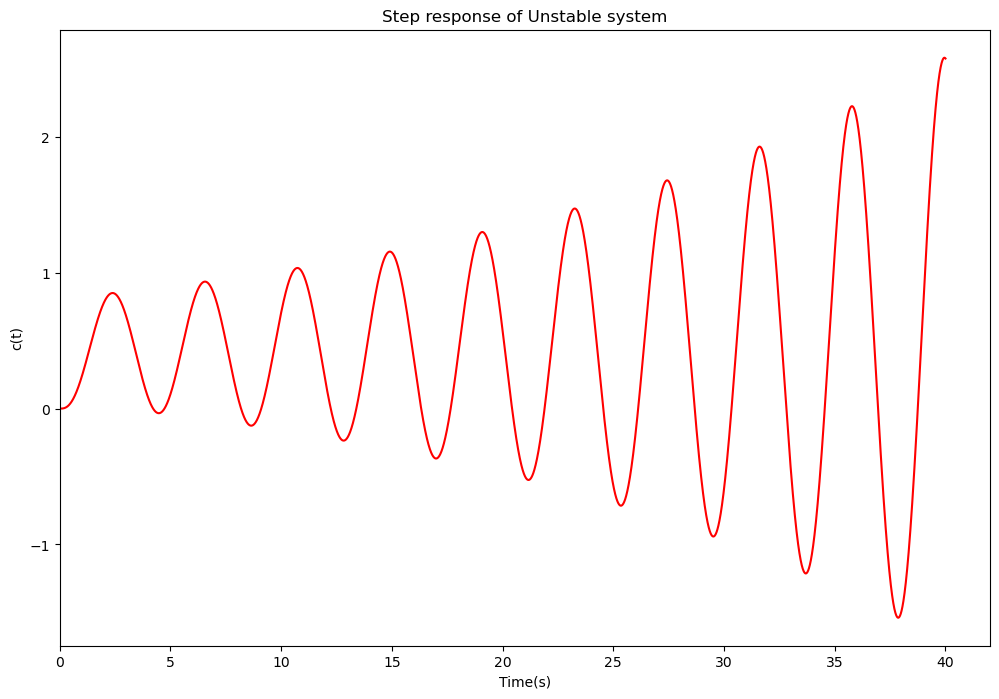

In [14]:
plt.style.use('default')

t=np.linspace(0, 40,10000)
_, yout=co.step_response(G,t)

fig, ax=plt.subplots(figsize=(12,8))
ax.plot(t, yout, color='r', linewidth=1.5)

ax.set_title('Step response of Unstable system')
ax.set_xlabel('Time(s)')
ax.set_ylabel('c(t)')
ax.set_xlim(0)

### Routh-Hurwitz Criterion

In [15]:
import sympy as sym
from tbcontrol.symbolic import routh

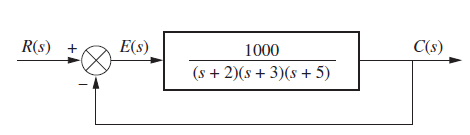

In [16]:
forward=1000/((s+2)*(s+3)*(s+5))
G=co.feedback(sys1=forward, sys2=1)
G

TransferFunction(array([1000]), array([1.00e+00, 1.00e+01, 3.10e+01, 1.03e+03]))

In [18]:
s=sym.symbols('s')
denominator=s**3+10*s**2+31*s+1030
denominator

s**3 + 10*s**2 + 31*s + 1030

In [19]:
denominator=sym.poly(denominator)
denominator

Poly(s**3 + 10*s**2 + 31*s + 1030, s, domain='ZZ')

In [20]:
routh(denominator)

Matrix([
[   1,   31],
[  10, 1030],
[ -72,    0],
[1030,    0]])

<ol>
    <li>The number of roots of
the polynomial that are in the right half-plane is equal to the number of sign changes in
the first column.</li>
</ol>

Make a Routh table and tell how many roots of the following polynomial
are in the right half-plane and in the left half-plane.
$$P(s)=3s^7 + 9s^6 + 6s^5 + 4s^4 + 7s^3 + 8s^2 + 2s + 6$$

In [21]:
P=3*s**7 + 9*s**6 + 6*s**5 + 4*s**4 + 7*s**3 + 8*s**2 + 2*s+6
p=sym.poly(P)
p

Poly(3*s**7 + 9*s**6 + 6*s**5 + 4*s**4 + 7*s**3 + 8*s**2 + 2*s + 6, s, domain='ZZ')

In [22]:
routh(p)

Matrix([
[         3,      6, 7, 2],
[         9,      4, 8, 6],
[      14/3,   13/3, 0, 0],
[    -61/14,      8, 6, 0],
[    787/61, 392/61, 0, 0],
[  8004/787,      6, 0, 0],
[-1581/1334,      0, 0, 0],
[         6,      0, 0, 0]])

The number of sign changes in first column is 4 times.So there are 4 roots in right half plane

### Routh-Hurwitz Criterion: Special Cases
<ol>
    <li>
        The Routh table sometimes will have a zero only in the first
column of a row
    </li>
    <li>
        The Routh table sometimes will have an entire row that consists of
zeros.
    </li>
</ol>

#### Zero Only in the First Column
$$T(s)=\dfrac {10}{s^5+2s^4+3s^3+6s^2+5s+3}$$

In [23]:
char_poly=s**5 + 2*s**4 + 3*s**3 + 6*s**2 + 5*s +3
char_poly=sym.poly(char_poly)
char_poly

Poly(s**5 + 2*s**4 + 3*s**3 + 6*s**2 + 5*s + 3, s, domain='ZZ')

In [24]:
routh(char_poly)

Matrix([
[  1,   3,   5],
[  2,   6,   3],
[  0, 7/2,   0],
[zoo, nan, nan],
[nan, nan,   0],
[nan, nan, nan]])

Stability via Reverse Coeffificients

In [ ]:
char_poly=3*s**5 + 2*s**4 + 3*s**3 + 6*s**2 + 5*s +3
char_poly=sym.poly(char_poly)
char_poly